Loading and Inspecting the Dataset

In [1]:
import pandas as pd
import numpy as np

# --- LOAD DATA ---
df = pd.read_csv("/content/train_data1.csv")

print(f"Original Shape: {df.shape}")

# Inspect the first few rows
print(df.head())

# Check data types and nulls
print(df.info())

Original Shape: (16209, 21)
           id             date   price  bedrooms  bathrooms  sqft_living  \
0  9117000170  20150505T000000  268643         4       2.25         1810   
1  6700390210  20140708T000000  245000         3       2.50         1600   
2  7212660540  20150115T000000  200000         4       2.50         1720   
3  8562780200  20150427T000000  352499         2       2.25         1240   
4  7760400350  20141205T000000  232000         3       2.00         1280   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      9240     2.0           0     0  ...      7        1810              0   
1      2788     2.0           0     0  ...      7        1600              0   
2      8638     2.0           0     0  ...      8        1720              0   
3       705     2.0           0     0  ...      7        1150             90   
4     13356     1.0           0     0  ...      7        1280              0   

   yr_built  yr_renovated  zipcode

Data Cleaning & Feature Engineering

In [2]:
# --- STEP 1: DROP IRRELEVANT COLUMNS ---
df = df.drop(['id'], axis=1)

# --- STEP 2: HANDLE DATES ---
df['date'] = pd.to_datetime(df['date'])
df['sale_year'] = df['date'].dt.year
df['sale_month'] = df['date'].dt.month
df = df.drop(['date'], axis=1)

# --- STEP 3: FEATURE ENGINEERING ---
df['house_age'] = df['sale_year'] - df['yr_built']
df['is_renovated'] = (df['yr_renovated'] > 0).astype(int)

# Optional: Drop yr_built and yr_renovated if you only use engineered features
df = df.drop(['yr_built', 'yr_renovated'], axis=1)

# --- STEP 4: OUTLIER REMOVAL ---
df = df[df['bedrooms'] < 15]  # drop extreme houses

# --- STEP 5: HANDLE CATEGORICALS ---
df['zipcode'] = df['zipcode'].astype('category')

# --- STEP 6: MISSING VALUES ---
# Fill numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns
cat_cols = df.select_dtypes(include='category').columns.tolist()
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# --- STEP 7: VERIFY CLEANING ---
print("-"*30)
print(f"Cleaned Data Shape: {df.shape}")
print(df.head())
print(df.info())


------------------------------
Cleaned Data Shape: (16208, 21)
    price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  268643         4       2.25         1810      9240     2.0           0   
1  245000         3       2.50         1600      2788     2.0           0   
2  200000         4       2.50         1720      8638     2.0           0   
3  352499         2       2.25         1240       705     2.0           0   
4  232000         3       2.00         1280     13356     1.0           0   

   view  condition  grade  ...  sqft_basement  zipcode      lat     long  \
0     0          3      7  ...              0    98055  47.4362 -122.187   
1     0          4      7  ...              0    98031  47.4034 -122.187   
2     0          3      8  ...              0    98003  47.2704 -122.313   
3     0          3      7  ...             90    98027  47.5321 -122.073   
4     0          3      7  ...              0    98042  47.3715 -122.074   

   sqft_living15 

/tmp/ipython-input-1235168034.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-1235168034.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Exploratory Data Analysis (EDA)

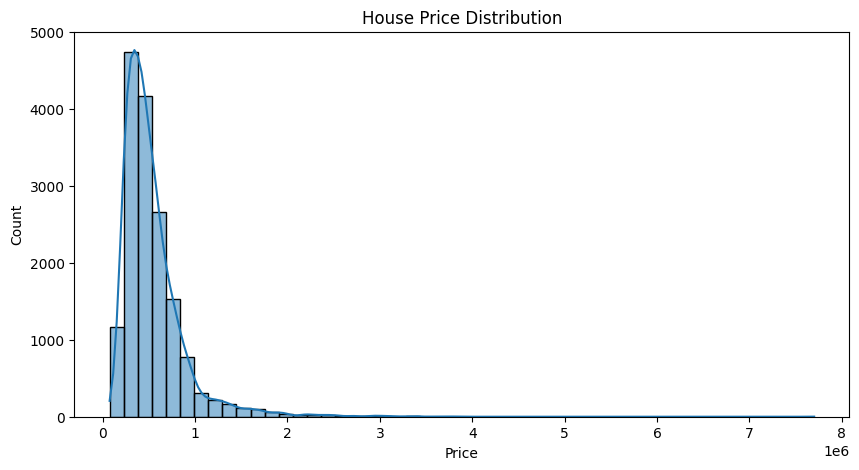

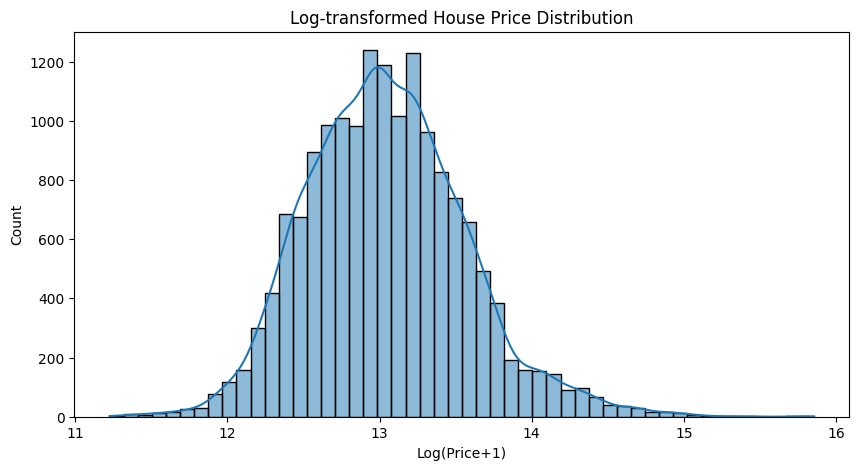

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("House Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

# Optional: log-transform if extremely skewed
import numpy as np
plt.figure(figsize=(10,5))
sns.histplot(np.log1p(df['price']), bins=50, kde=True)
plt.title("Log-transformed House Price Distribution")
plt.xlabel("Log(Price+1)")
plt.ylabel("Count")
plt.show()


Visualise each feature distribution:

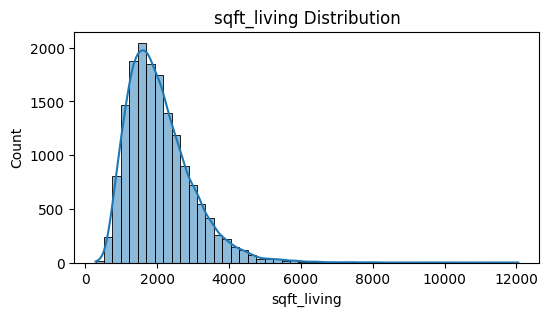

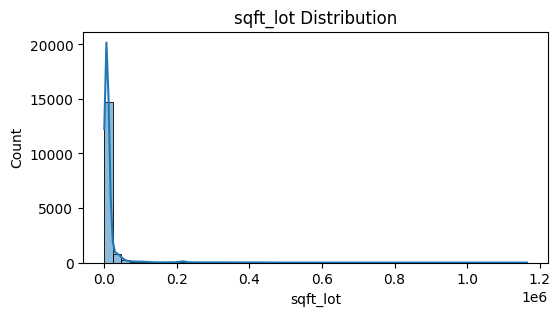

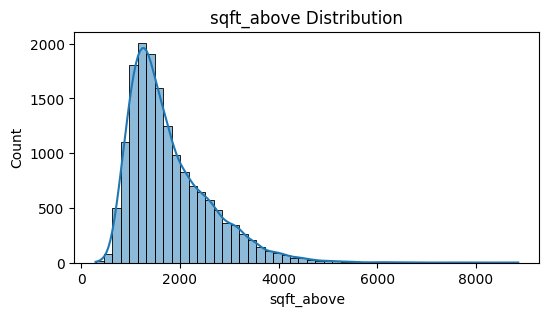

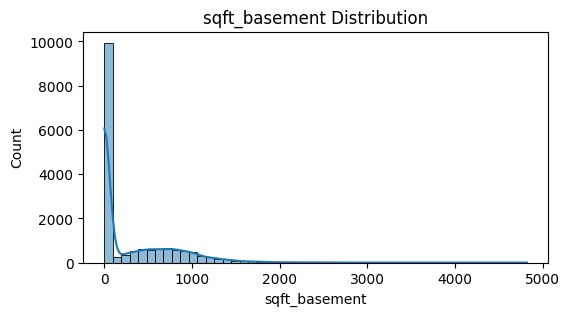

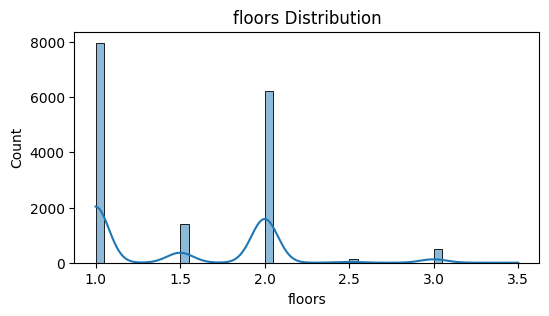

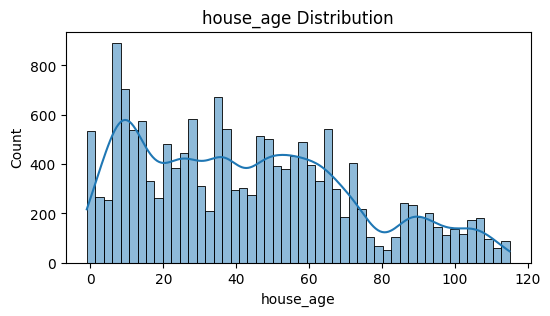

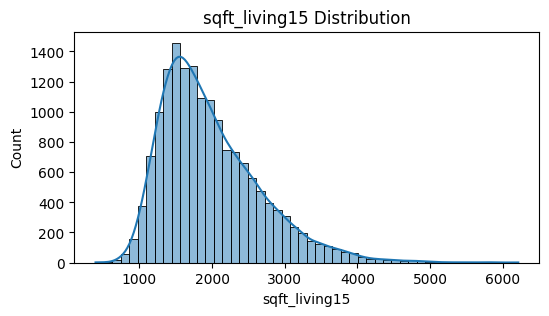

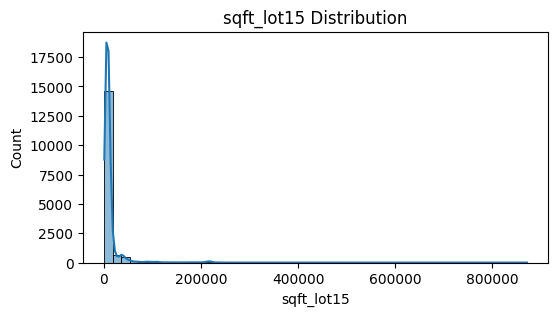

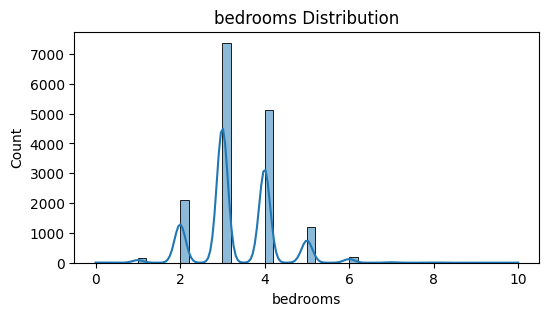

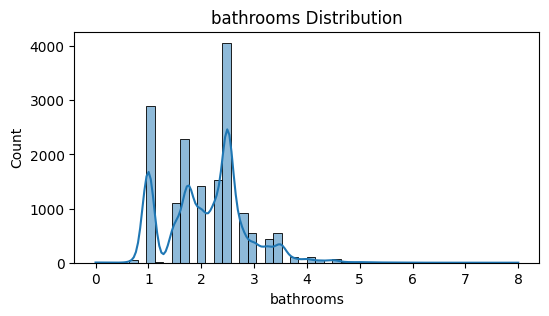

In [4]:
numeric_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
                    'floors', 'house_age', 'sqft_living15', 'sqft_lot15',
                    'bedrooms', 'bathrooms']

for col in numeric_features:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"{col} Distribution")
    plt.show()


categorical data distribution:

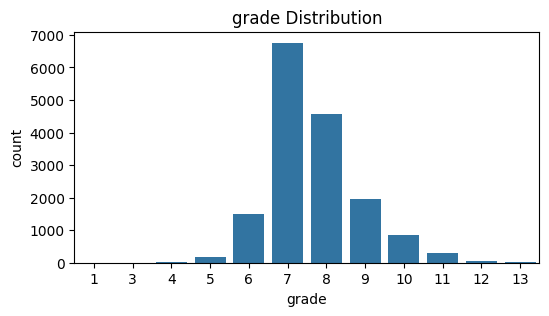

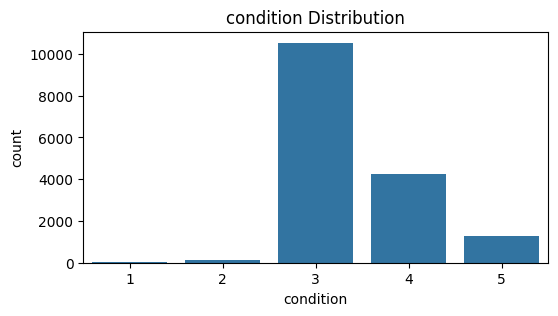

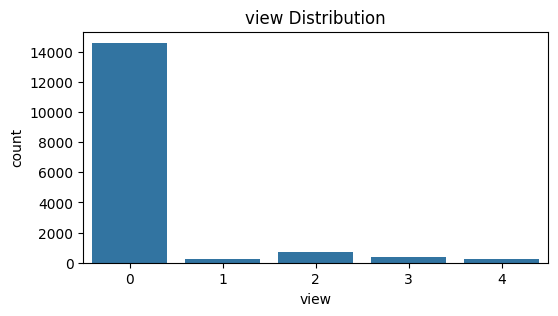

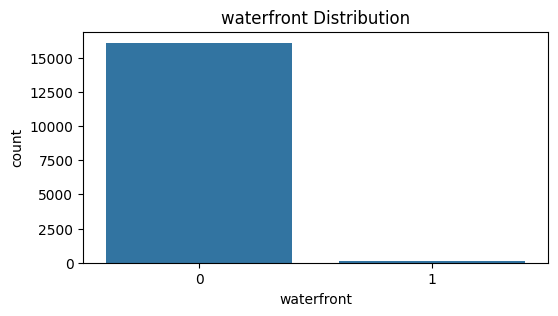

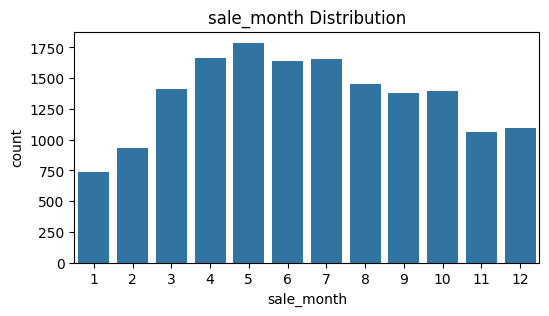

In [5]:
cat_features = ['grade', 'condition', 'view', 'waterfront', 'sale_month']

for col in cat_features:
    plt.figure(figsize=(6,3))
    sns.countplot(x=df[col])
    plt.title(f"{col} Distribution")
    plt.show()


Visualise each feature how it is allined with target varible (price):

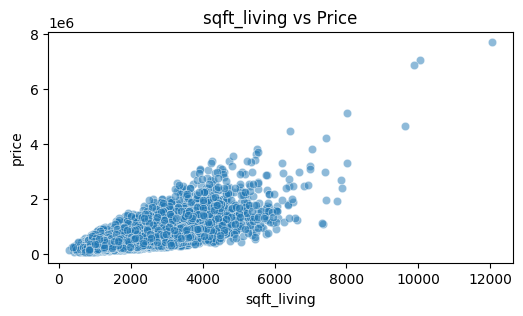

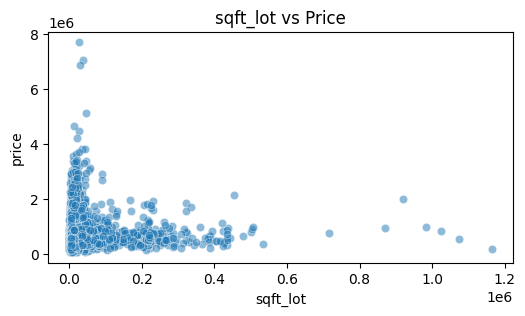

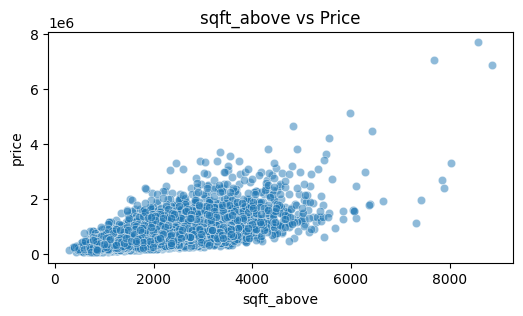

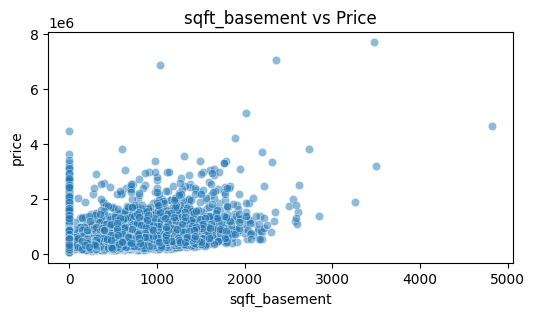

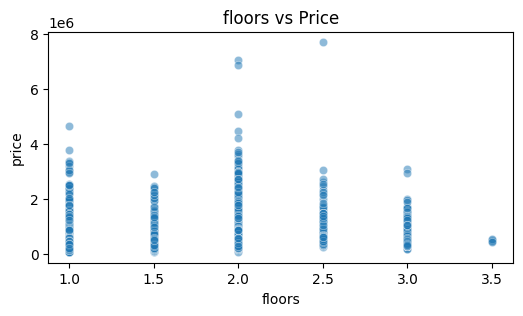

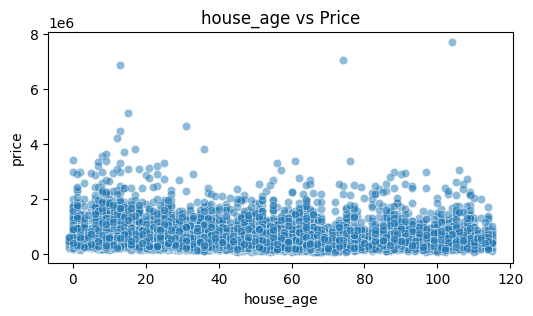

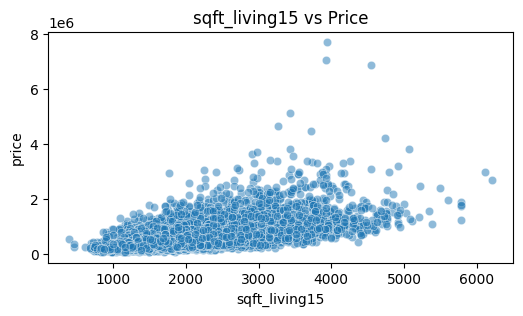

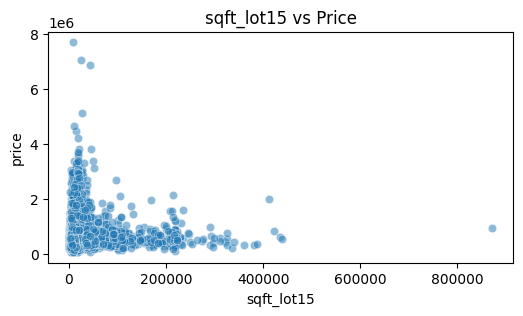

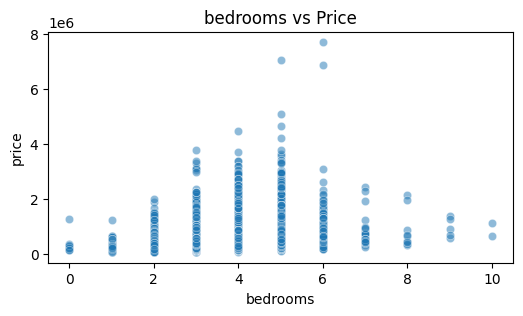

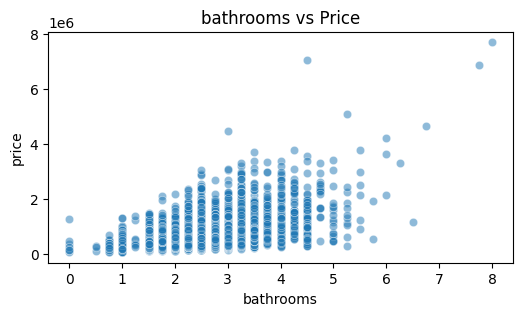

In [6]:
for col in numeric_features:
    plt.figure(figsize=(6,3))
    sns.scatterplot(x=df[col], y=df['price'], alpha=0.5)
    plt.title(f"{col} vs Price")
    plt.show()


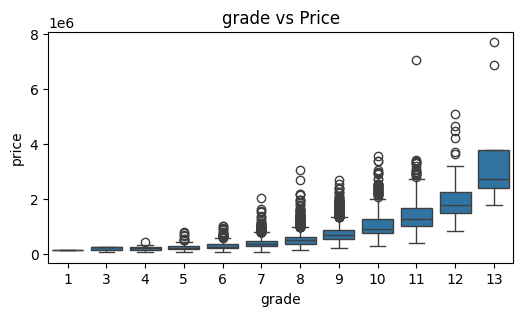

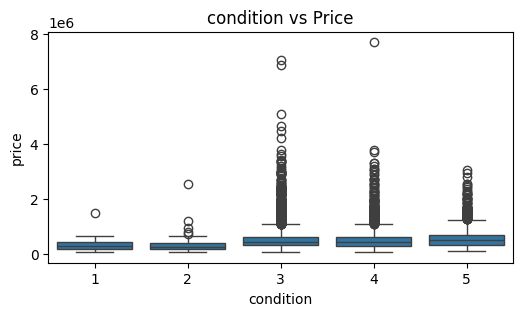

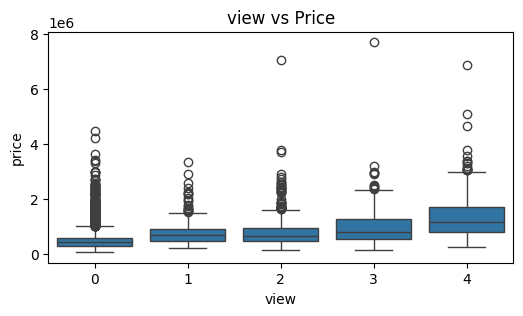

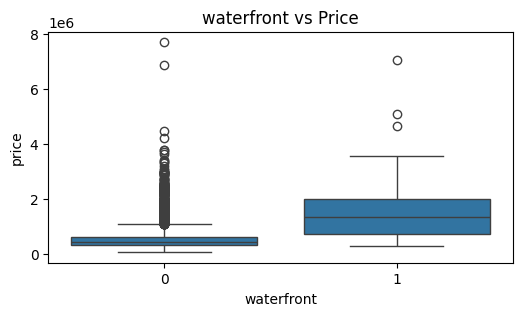

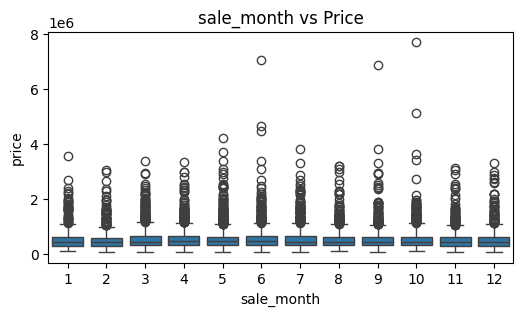

In [7]:
for col in cat_features:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col], y=df['price'])
    plt.title(f"{col} vs Price")
    plt.show()


Correlation matrix to visualize how two features are correlated

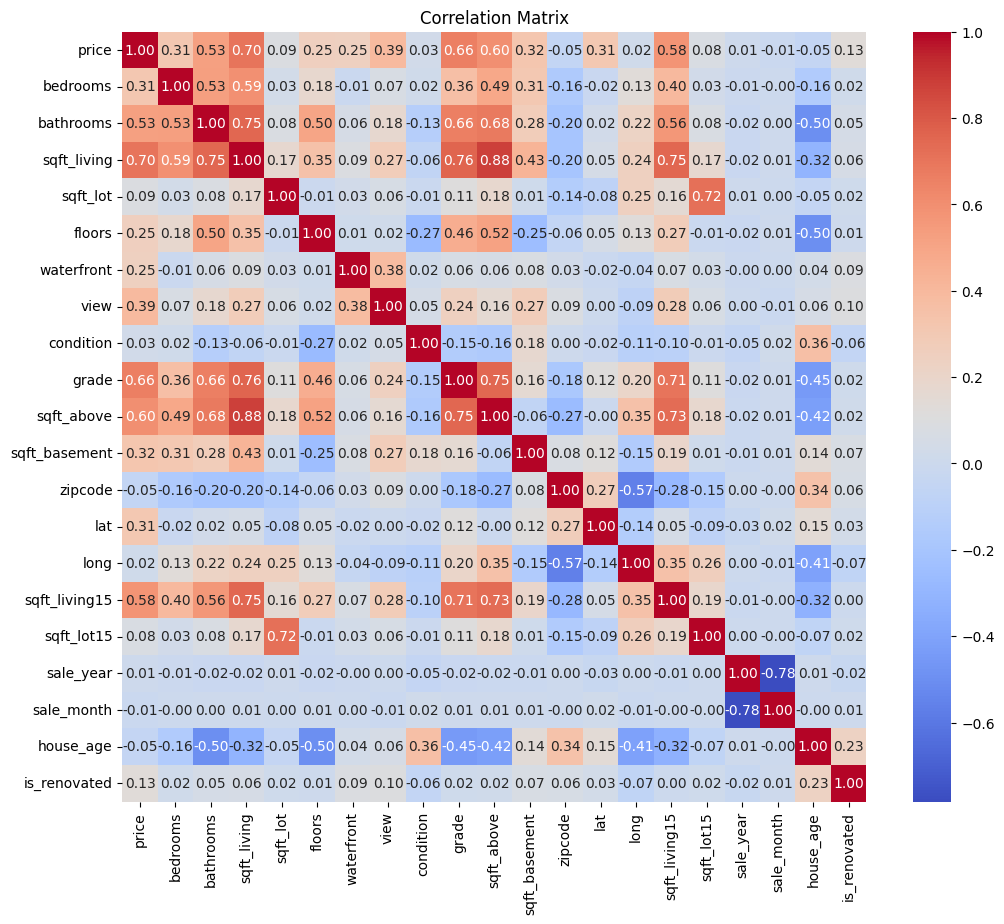

In [8]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


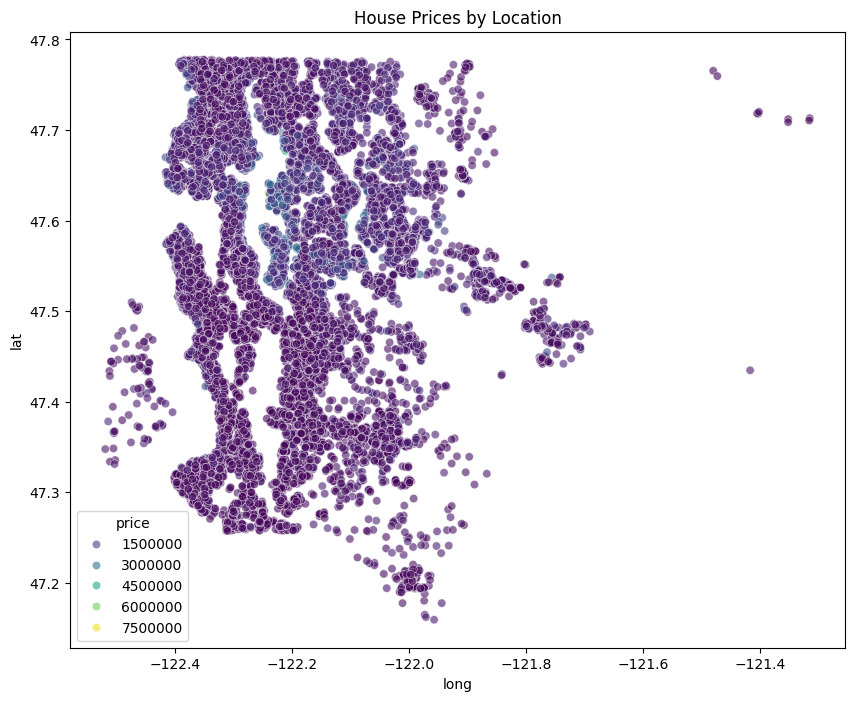

In [9]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    x=df['long'], y=df['lat'],
    hue=df['price'], palette='viridis',
    alpha=0.6
)
plt.title("House Prices by Location")
plt.show()


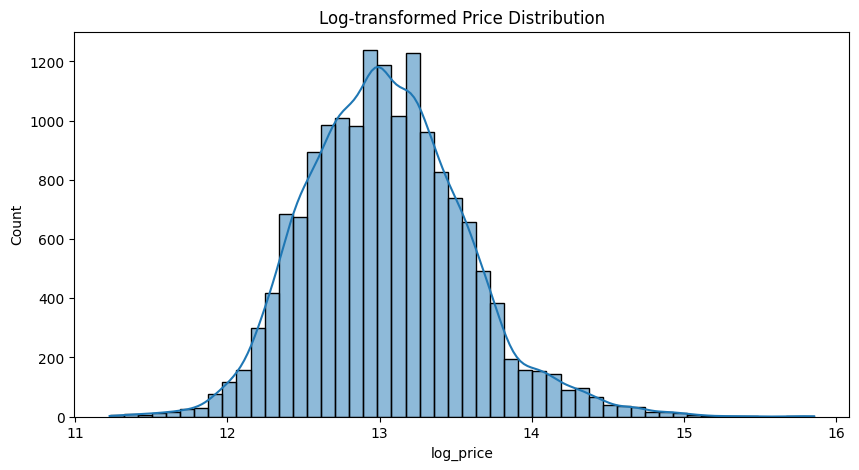

In [10]:
import numpy as np

# Apply log1p: log(1 + price) to handle zeros safely
df['log_price'] = np.log1p(df['price'])

# Visualize log-transformed distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['log_price'], bins=50, kde=True)
plt.title("Log-transformed Price Distribution")
plt.show()


save the cleaned dataset

In [12]:
# Assuming df is your cleaned DataFrame after preprocessing & EDA

# Save to CSV
df.to_csv("cleaned_train1.csv", index=False)

print("Cleaned dataset saved as 'cleaned_train1.csv'")


Cleaned dataset saved as 'cleaned_train1.csv'
